In [4]:
#!pip install pandas_datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)


In [5]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np 
import seaborn as sns 

In [6]:
df1 = pdr.get_data_yahoo('msft')
df1.shape

(1258, 6)

In [7]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-02,43.380001,41.880001,42.360001,43.360001,37671500.0,39.405365
2015-09-03,43.980000,43.279999,43.410000,43.500000,28285200.0,39.532589
2015-09-04,43.040001,42.200001,42.810001,42.610001,37138800.0,38.723778
2015-09-08,44.000000,43.200001,43.299999,43.889999,32469800.0,39.887024
2015-09-09,44.400002,42.910000,44.209999,43.070000,33469500.0,39.141819


In [8]:
df1.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,100.371415,98.436280,99.431288,99.474595,2.978611e+07,96.602327
std,44.712285,43.534845,44.134982,44.177987,1.447410e+07,45.305417
min,43.040001,41.880001,42.360001,42.610001,7.425600e+06,38.723778
25%,61.185000,60.329999,60.787499,60.892501,2.068352e+07,56.982052
50%,93.395000,91.520000,92.445000,92.430000,2.608655e+07,89.171555
75%,130.617496,128.687500,129.782497,129.615002,3.387298e+07,127.322741
max,231.149994,226.580002,228.179993,228.910004,1.352271e+08,228.910004


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-09-02 to 2020-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


In [10]:
df2 = df1.reset_index()

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [12]:
df2['Year'] = df2['Date'].dt.year

In [13]:
df2.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year
0,2015-09-02,43.380001,41.880001,42.360001,43.360001,37671500.0,39.405365,2015
1,2015-09-03,43.980000,43.279999,43.410000,43.500000,28285200.0,39.532589,2015
2,2015-09-04,43.040001,42.200001,42.810001,42.610001,37138800.0,38.723778,2015
3,2015-09-08,44.000000,43.200001,43.299999,43.889999,32469800.0,39.887024,2015
4,2015-09-09,44.400002,42.910000,44.209999,43.070000,33469500.0,39.141819,2015


In [14]:
df2['work_week'] = df2['Date'].dt.week
df2['month'] = df2['Date'].dt.month
df2['day_of_week'] = df2['Date'].dt.day_name()

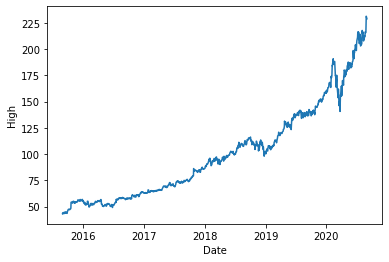

In [15]:
sns.lineplot(data=df2, x='Date',y='High')

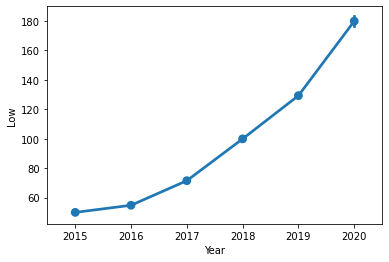

In [16]:
sns.pointplot(data=df2, x='Year',y='Low')

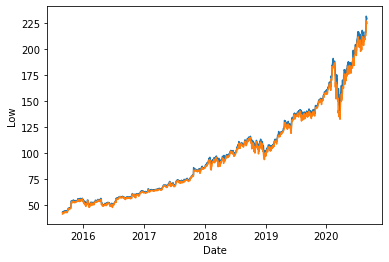

In [17]:
sns.lineplot(data=df2, x='Date',y='High')
sns.lineplot(data=df2, x='Date',y='Low')

In [18]:
cond1 = ((df2['Year']==2019) | (df2['Year']==2020))
df2_1920 = df2.loc[cond1]

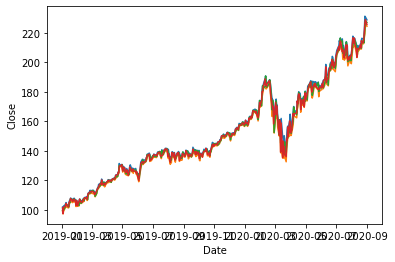

In [19]:
sns.lineplot(data=df2_1920, x='Date', y='High')
sns.lineplot(data=df2_1920, x='Date', y='Low')
sns.lineplot(data=df2_1920, x='Date', y='Open')
sns.lineplot(data=df2_1920, x='Date', y='Close')

In [20]:
import matplotlib.pyplot as plt 

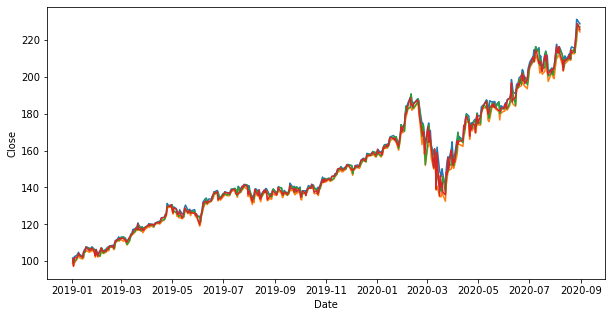

In [21]:
plt.figure(figsize=[10,5])
sns.lineplot(data=df2_1920, x='Date', y='High')
sns.lineplot(data=df2_1920, x='Date', y='Low')
sns.lineplot(data=df2_1920, x='Date', y='Open')
sns.lineplot(data=df2_1920, x='Date', y='Close')

In [22]:
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

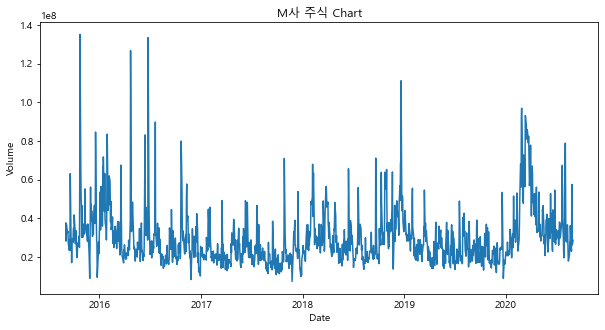

In [23]:
plt.figure(figsize=[10,5])
plt.title('M사 주식 Chart')
img = sns.lineplot(data=df2, x='Date', y='Volume')
img.get_figure().savefig('Chart.pdf')

In [24]:
pd.pivot_table(data=df2, index='Year',values='Volume')

,Volume
Year,
2015,3.494709e+07
2016,3.103066e+07
2017,2.243617e+07
2018,3.159019e+07
2019,2.458279e+07
2020,4.142953e+07


In [25]:
df3 = df2[['Date','Open']]

In [26]:
df3

,Date,Open
0,2015-09-02,42.360001
1,2015-09-03,43.410000
2,2015-09-04,42.810001
3,2015-09-08,43.299999
4,2015-09-09,44.209999
...,...,...
1253,2020-08-25,213.100006
1254,2020-08-26,217.880005
1255,2020-08-27,222.889999
1256,2020-08-28,228.179993


In [27]:
import statsmodels.api as sm 
import warnings 
import itertools
from pylab import rcParams 

In [28]:
rcParams['figure.figsize'] = 15,10

In [29]:
#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [30]:
data1 = df3.set_index('Date')

In [31]:
y = data1['Open'].resample('1W').mean()

<ipython-input-32-7a47d0d0d8eb>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition= sm.tsa.seasonal_decompose(y, freq= 11, model='additive')
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


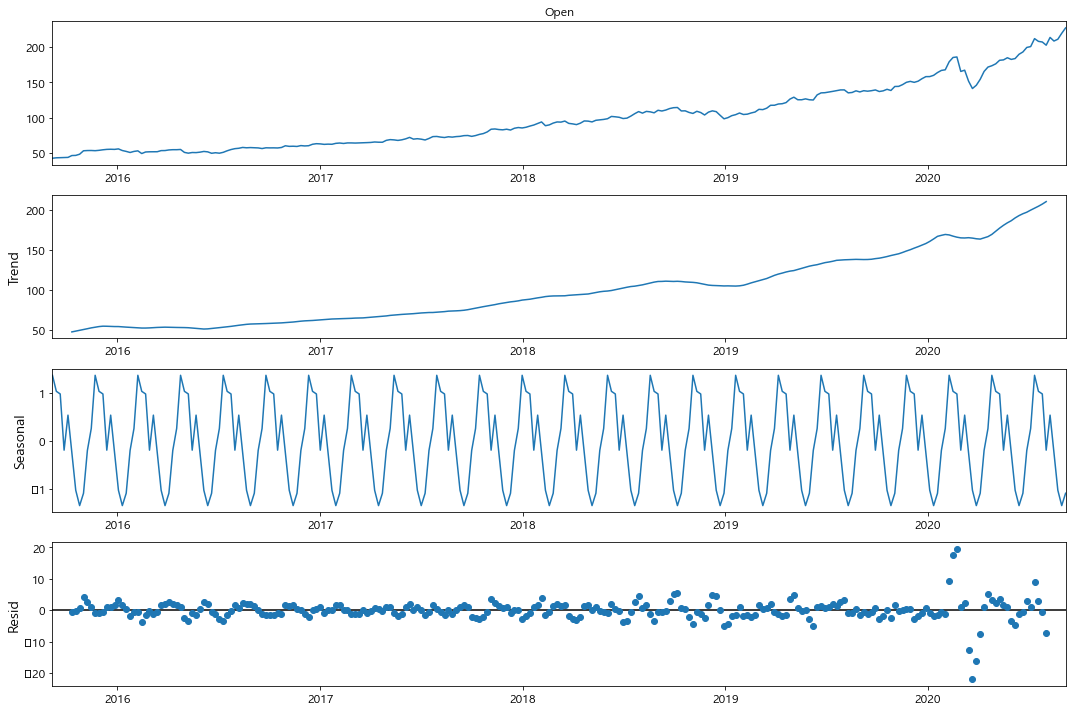

In [32]:
decomposition= sm.tsa.seasonal_decompose(y, freq= 11, model='additive')
fig = decomposition.plot()
plt.show()

In [33]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [35]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Ma

In [36]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,
             'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [37]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
27,"(0, 1, 1)","(0, 1, 1, 12)",1234.626849
59,"(1, 1, 1)","(0, 1, 1, 12)",1235.776046
43,"(1, 0, 1)","(0, 1, 1, 12)",1238.195703
51,"(1, 1, 0)","(0, 1, 1, 12)",1238.473240
31,"(0, 1, 1)","(1, 1, 1, 12)",1241.114879
...,...,...,...
2,"(0, 0, 0)","(0, 1, 0, 12)",1975.451176
9,"(0, 0, 1)","(0, 0, 1, 12)",2727.226726
8,"(0, 0, 1)","(0, 0, 0, 12)",2838.702012
1,"(0, 0, 0)","(0, 0, 1, 12)",3062.423591


In [38]:
mod = sm.tsa.statespace.SARIMAX(y,
                                 order=(0, 1, 1),
                                 seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1383      0.038      3.632      0.000       0.064       0.213
ma.S.L12      -0.8692      0.047    -18.648      0.000      -0.961      -0.778
sigma2        10.4690      0.395     26.525      0.000       9.695      11.243


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


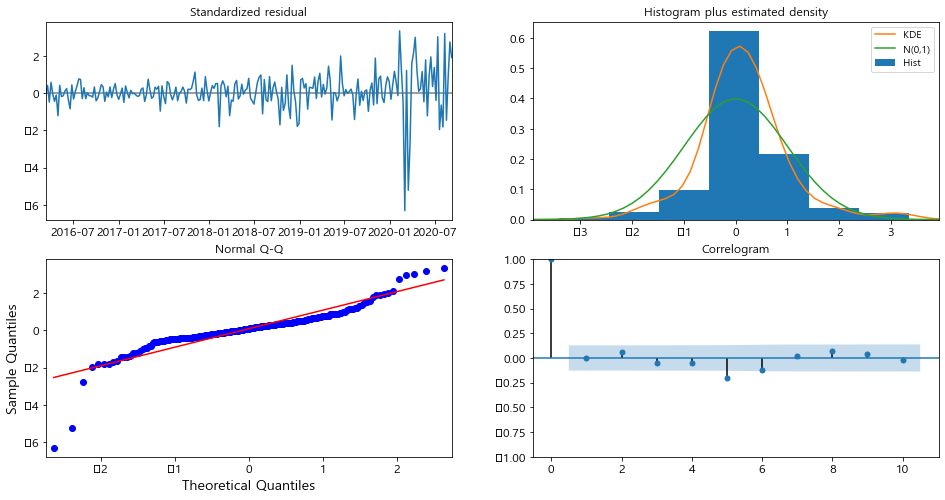

In [39]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [40]:
results.get_prediction()

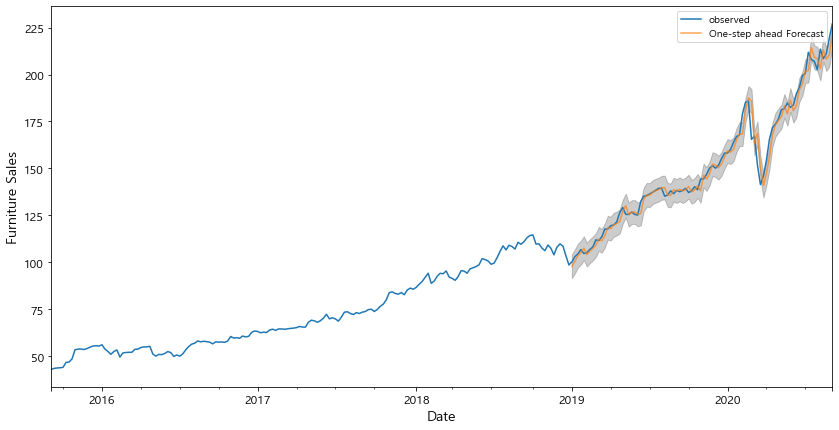

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-06'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [44]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 22.55


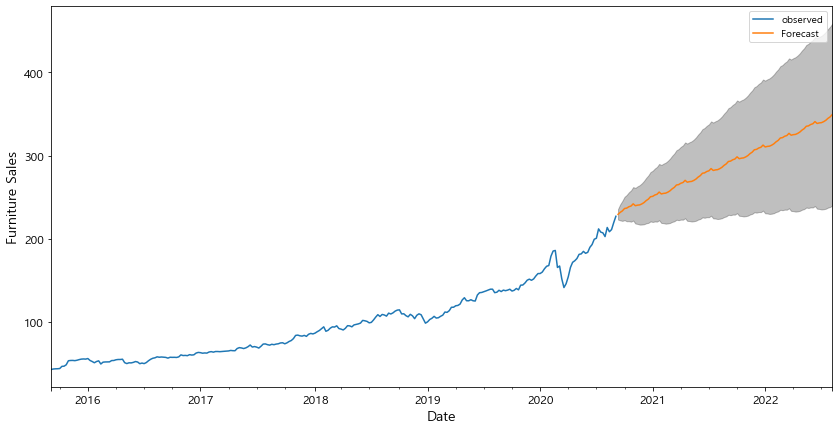

In [45]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()